In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [2]:
titanic = pd.read_csv('C:/Users/Sharad/Desktop/Business Analytics/python/eda files/Titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
survived = titanic['Survived'].value_counts()
print('Number of passengers survived:', survived[1])
print('Number of passengers that were not able to survive:', survived[0])

Number of passengers survived: 342
Number of passengers that were not able to survive: 549


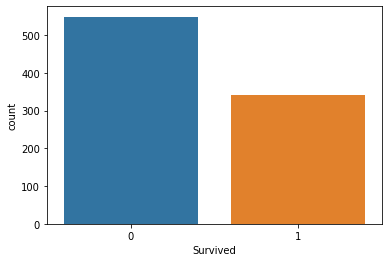

In [6]:
sns.countplot('Survived', data = titanic)

In [7]:
percentage_of_people_survived = ((survived[1]/891)*100)
print('Percentage of survived passengers are:',percentage_of_people_survived)

Percentage of survived passengers are: 38.38383838383838


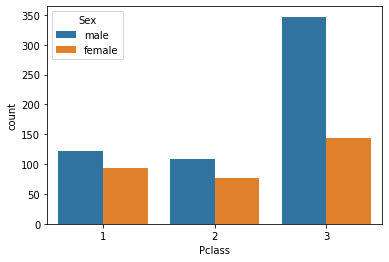

In [8]:
sns.countplot('Pclass', hue ='Sex', data = titanic,)

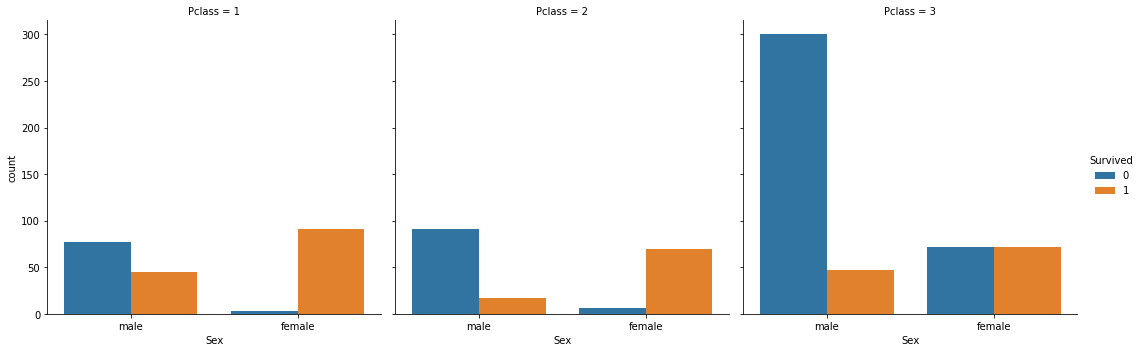

In [9]:
sns.catplot(x = 'Sex', col = 'Pclass', hue = 'Survived', data = titanic, kind = 'count')

In [10]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
# Loop for finding missing values
def missing_values_table(titanic):
    # Total missing values
    mis_val = titanic.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(titanic)
    
    # Making a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 :'Missing Values', 1: '% of total values'})
    
    # Sort the table by percentage of missing decending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values', ascending = False).round(1)
    
    #Print some summary information
    print('Your selected dataframe has', (titanic.shape[1]), 'columns.')
    print('There are', mis_val_table_ren_columns.shape[0],'columns that have missing values')
    return mis_val_table_ren_columns
miss = missing_values_table(titanic)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values


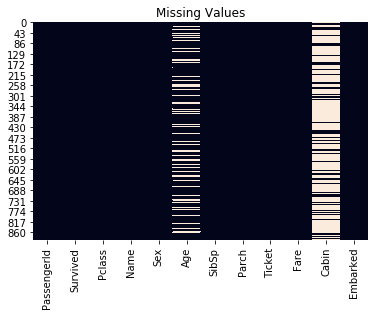

In [12]:
sns.heatmap(titanic.isnull(), cbar = False)
plt.title('Missing Values')
plt.show()

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic1 = titanic.copy()

In [15]:
titanic1['Age'].median()

28.0

In [16]:
# Filling missing values with median
titanic1['Age'] = titanic1['Age'].fillna(titanic1['Age'].median)

In [17]:
titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic1['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

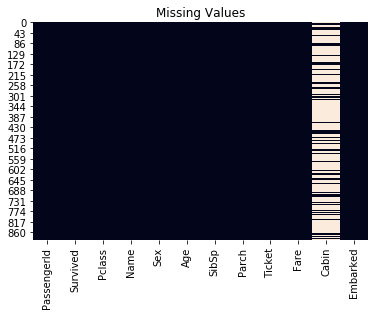

In [19]:
sns.heatmap(titanic1.isnull(), cbar = False)
plt.title('Missing Values')
plt.show()

# Who were the passengers on titanic(name, age, gender etc)

In [20]:
titanic['Age'] = titanic['Age'].astype(str)

In [21]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
titanic['Passengers'] = titanic['Name']+' '+titanic['Age']+' '+titanic['Sex']

In [23]:
titanic['Passengers'][39]

'Nicola-Yarred, Miss. Jamila 14.0 female'

In [24]:
titanic['Age'] = titanic['Age'].astype(float)

In [25]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 14:
        return 'child'
    else:
        return sex

In [26]:
titanic['Person'] = titanic[['Age','Sex']].apply(male_female_child, axis = 1)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris 22.0 male",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina 26.0 female",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel) 3...",female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry 35.0 male",male


In [28]:
titanic['Person'].value_counts()

male      540
female    280
child      71
Name: Person, dtype: int64

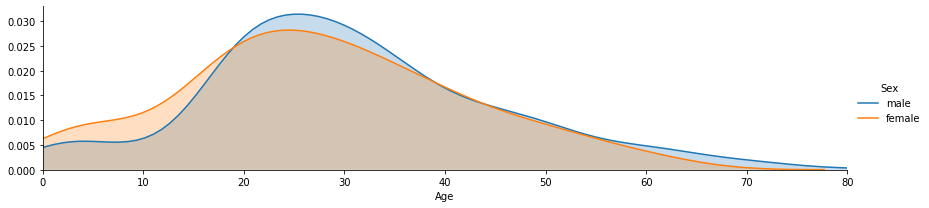

In [29]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

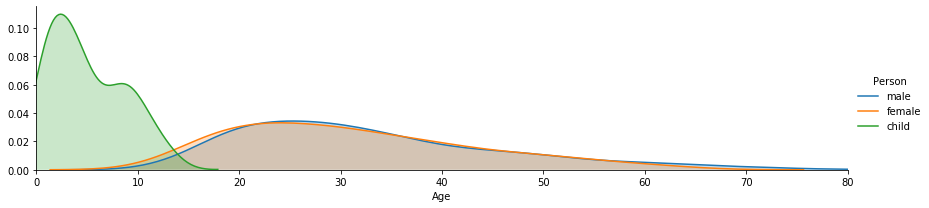

In [30]:
fig = sns.FacetGrid(titanic, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

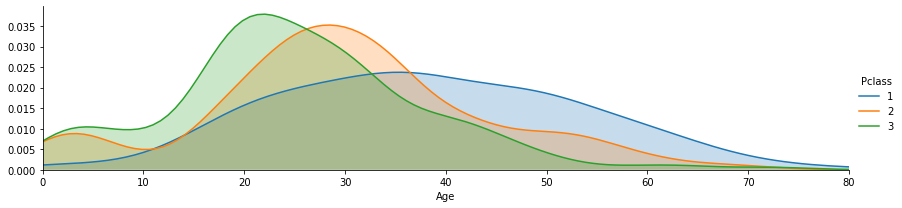

In [31]:
fig = sns.FacetGrid(titanic, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

# What deck were passengers on and how does that relate to their class

In [32]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Passengers       0
Person           0
dtype: int64

In [33]:
titanic['Embarked'].mode()

0    S
dtype: object

In [34]:
titanic['Embarked'].fillna('S', inplace = True)

In [35]:
Deck = titanic['Cabin'].dropna()

In [36]:
Deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

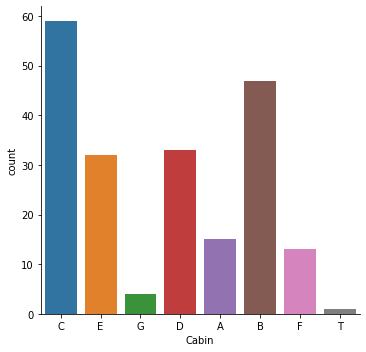

In [37]:
#So lets grab the first letter for the deck level with a simple for loop

# Set an empty list
levels = []

# Loop to grab first letter
for level in Deck:
    levels.append(level[0])
    
# Reset data frame and use factor plot
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.catplot('Cabin', data = cabin, kind = 'count')

# Where did the passengers came from

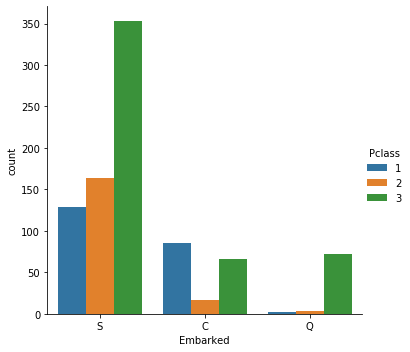

In [38]:
sns.catplot('Embarked', hue = 'Pclass', data = titanic, kind = 'count')

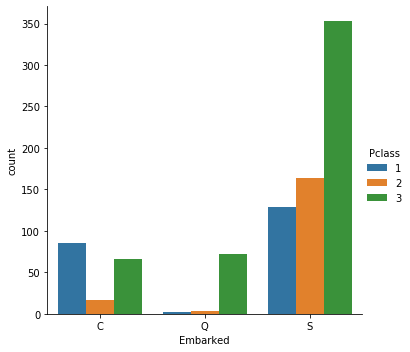

In [39]:
sns.catplot('Embarked',hue='Pclass',data=titanic,kind='count',order=['C','Q','S'])

In [40]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Passengers      object
Person          object
dtype: object

In [41]:
traveldetail = titanic['Name']+ 'boarded from'  +titanic['Embarked']

In [42]:
traveldetail[7]

'Palsson, Master. Gosta Leonardboarded fromS'

here S stands for southampton,Q stands for Queensland and C stands for Cherbourg.

# Who was alone and who were with their family

In [43]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
family = titanic[(titanic['SibSp'] > 0) & (titanic['Parch'] > 0)]
family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,"Palsson, Master. Gosta Leonard 2.0 male",child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S,"Sandstrom, Miss. Marguerite Rut 4.0 female",child
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,"Andersson, Mr. Anders Johan 39.0 male",male
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,"Rice, Master. Eugene 2.0 male",child
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,"Palsson, Miss. Torborg Danira 8.0 female",child


In [46]:
alone = titanic[(titanic['SibSp'] == 0) & (titanic['Parch'] == 0)]
alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers,Person
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina 26.0 female",female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry 35.0 male",male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"Moran, Mr. James nan male",male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"McCarthy, Mr. Timothy J 54.0 male",male
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"Bonnell, Miss. Elizabeth 58.0 female",female


# What factors helped someone survive the sinking

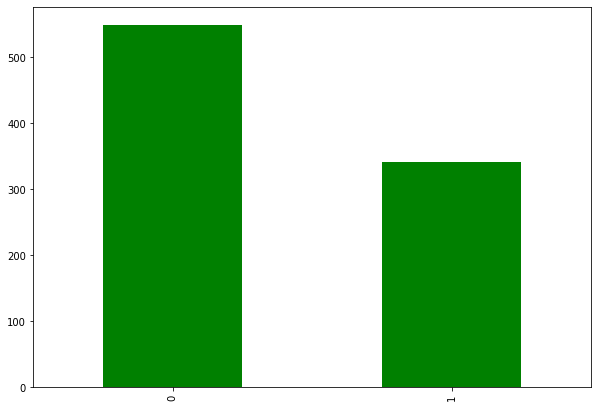

In [47]:
titanic['Survived'].value_counts().plot(kind = 'bar', figsize = (10,7), color = 'green')
#  figsize is used for (width, height) of the plot.

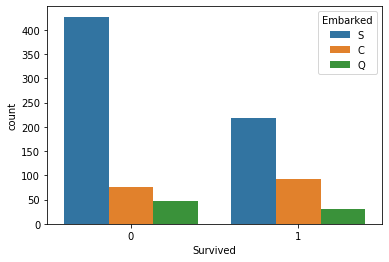

In [48]:
sns.countplot('Survived', hue = 'Embarked', data = titanic)

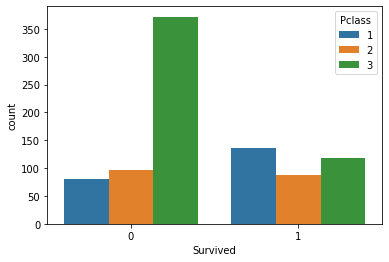

In [49]:
sns.countplot('Survived', hue = 'Pclass', data = titanic)

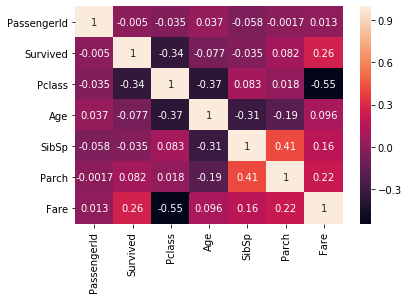

In [50]:
sns.heatmap(titanic.corr(), annot = True )

# Did having a family member increase the odds of surviving the crash

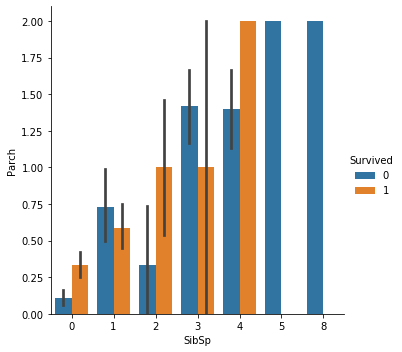

In [51]:
sns.catplot(x ='SibSp', y = 'Parch', hue = 'Survived', data = titanic, kind = 'bar')

In [52]:
survive = titanic['Survived'] == 1

In [53]:
survive.value_counts()

False    549
True     342
Name: Survived, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


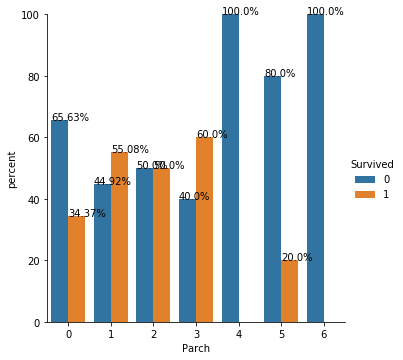

In [54]:
# To indicate the percentage over the bar
# Normalise = True --- converts in decimal
x,y = 'Parch', 'Survived'

df1 = titanic.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [55]:
average_survival = (55.08 + 50 + 60 + 0 + 20)/5

In [56]:
average_survival

37.016

Since the average survival rate of a family survivng together is higher, so yes it affects the survival chances of passengers.

# Did the deck have an effect on passenger survival rate ?

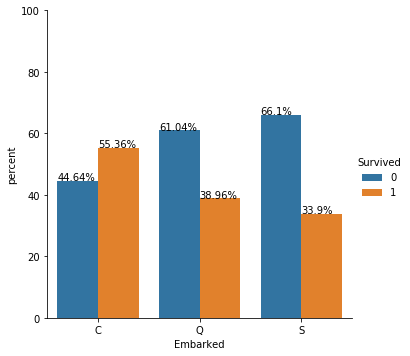

In [57]:
x,y = 'Embarked', 'Survived'

df1 = titanic.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [58]:
titanic['Cabin'].isnull().sum()

687

In [59]:
null_value_percentage_cabin = (687/891)*100
null_value_percentage_cabin

77.10437710437711

C:\Users\Sharad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sharad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


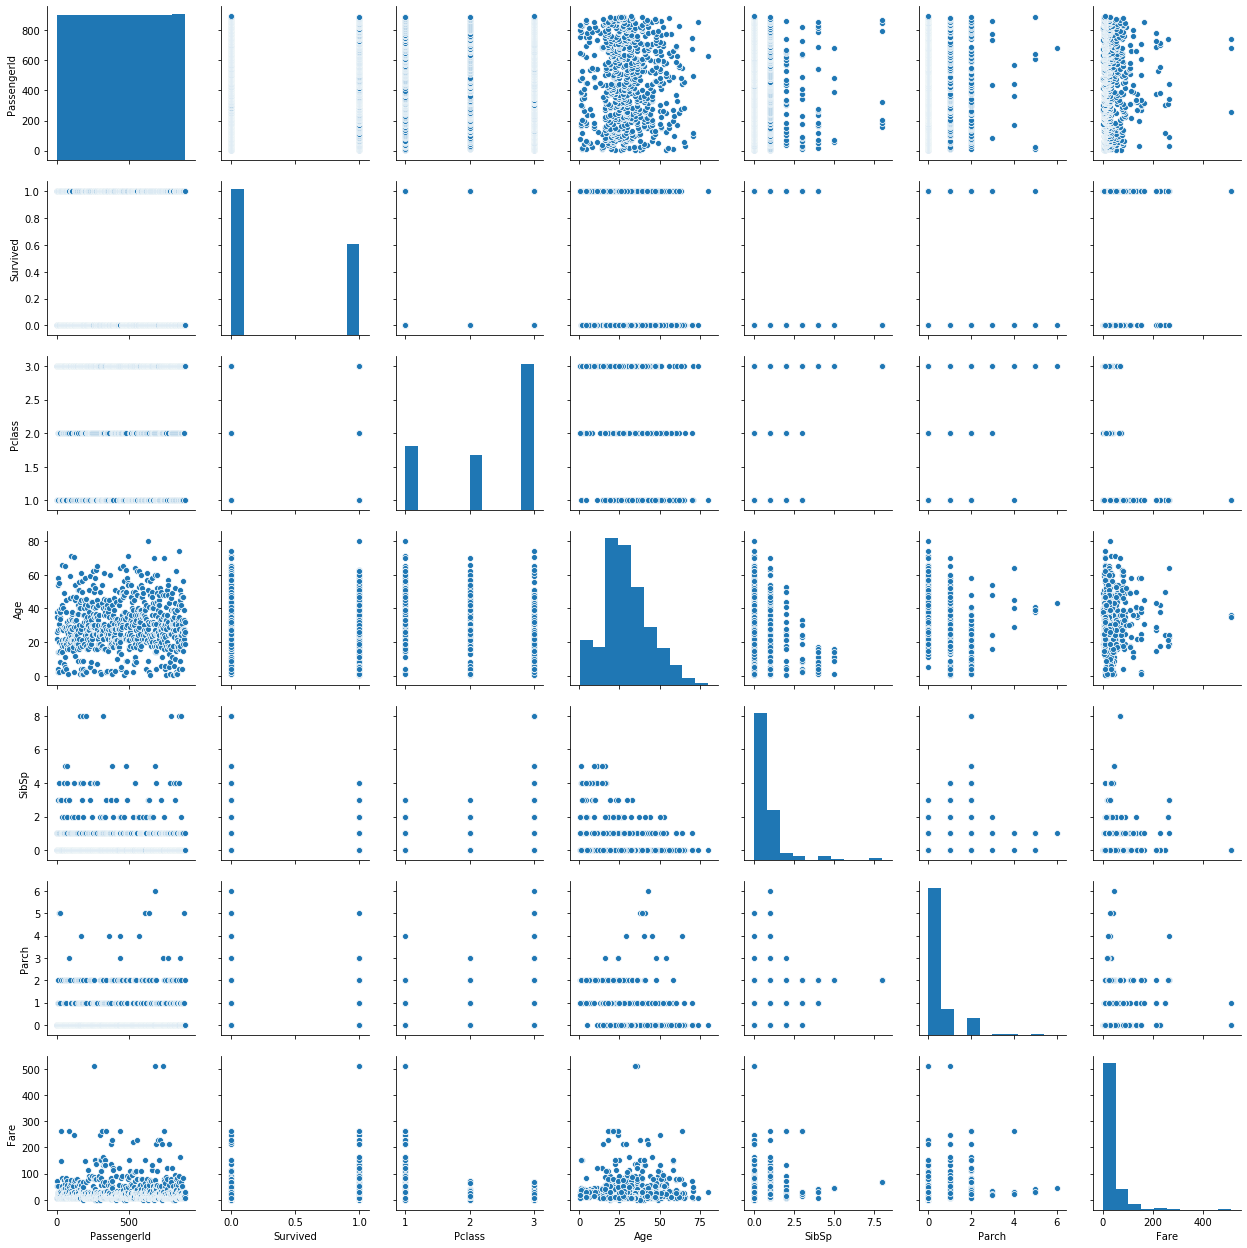

In [60]:
sns.pairplot(titanic)